In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [119]:
def get_plot(signal_f, interf_f, fs_rf, fc, fs_bw, hd, il, fs_hd, clk_mix_prod_up, clk_mix_prod_down, sw):
    
    # Get HD
    hd2, hd3, hd4, hd5 = hd
    
    # get IL
    il1, il2, il3, il4, il5, il6, il7 = il
    
    # get FS/N +- HD
    fs2_m_hd2, fs2_m_hd3, fs4_m_hd2, fs4_p_hd2, fs4_m_hd3, fs4_p_hd3, fs8_m_hd2, fs8_p_hd2, fs8_m_hd3, fs8_p_hd3 = fs_hd
    
    # setup figure
    fig, ax = plt.subplots(figsize=(10,8))
    ax.set_xlabel('Frequency (MHz)', fontsize=15)
    ax.set_ylabel('Harmonic No.', fontsize=15)
    ax.set_xlim([0, fs_rf/2 + 100])
    ax.set_ylim([0, 7])
    ax.grid(True)
    
    # Rx Band
    ax.plot([min(signal_f), max(signal_f)], np.repeat(6,2), label='Rx Band', marker='o', color='tab:blue')
    plt.vlines([min(signal_f), max(signal_f)], ymin=0, ymax=6, color='tab:blue')
    
    # Nyquist
    ax.plot([fs_rf/2], [6], marker='o', color='tab:gray', label='Nyquist')
    plt.vlines(x=fs_rf/2, ymin=0, ymax=6, color='tab:gray')
    
    # Harmonic Distortion
    if sw[0]: ax.plot([min(hd2),max(hd2)], np.repeat(2,2), label='HD2', marker='o', color='tab:orange')
    if sw[1]: ax.plot([min(hd3),max(hd3)], np.repeat(3,2), label='HD3', marker='o', color='tab:green')
    if sw[2]: ax.plot([min(hd4),max(hd4)], np.repeat(4,2), label='HD4', marker='o', color='tab:red')
    if sw[3]: ax.plot([min(hd5),max(hd5)], np.repeat(5,2), label='HD5', marker='o', color='tab:olive')
    
    # Interleaving Spur
    if sw[4] and il1 != 0: ax.plot([min(il1),max(il1)], np.repeat(0.4,2), label='IL RX1', marker='o', color='tab:purple')
    if sw[5] and il2 != 0: ax.plot([min(il2),max(il2)], np.repeat(0.5,2), label='IL RX2', marker='o', color='tab:brown')
    if sw[6] and il3 != 0: ax.plot([min(il3),max(il3)], np.repeat(0.6,2), label='IL RX3', marker='o', color='tab:pink')
    if sw[7] and il4 != 0: ax.plot([min(il4),max(il4)], np.repeat(0.7,2), label='IL RX4', marker='o', color='tab:gray')
    if sw[8] and il5 != 0: ax.plot([min(il5),max(il5)], np.repeat(0.8,2), label='IL RX5', marker='o', color='tab:cyan')
    
    # FS/N +- HD
    if sw[8] and fs2_m_hd2 != 0: ax.plot([min(fs2_m_hd2),max(fs2_m_hd2)], np.repeat(2.5,2), label='FS/2-HD2', marker='o', color='lightsalmon')
    if sw[9] and fs2_m_hd3 != 0: ax.plot([min(fs2_m_hd3),max(fs2_m_hd3)], np.repeat(3.5,2), label='FS/2-HD3', marker='o', color='bisque')
    if sw[10] and fs4_m_hd2 != 0: ax.plot([min(fs4_m_hd2),max(fs4_m_hd2)], np.repeat(2.5,2), label='FS/4-HD2', marker='o', color='gold')    
    if sw[11] and fs4_p_hd2 != 0: ax.plot([min(fs4_p_hd2),max(fs4_p_hd2)], np.repeat(2.5,2), label='FS/4+HD2', marker='o', color='sienna')
    if sw[12] and fs4_m_hd3 != 0: ax.plot([min(fs4_m_hd3),max(fs4_m_hd3)], np.repeat(3.5,2), label='FS/4-HD3', marker='o', color='olivedrab')
    if sw[13] and fs4_p_hd3 != 0: ax.plot([min(fs4_p_hd3),max(fs4_p_hd3)], np.repeat(3.5,2), label='FS/4+HD3', marker='o', color='greenyellow')
    if sw[14] and fs8_m_hd2 != 0: ax.plot([min(fs8_m_hd2),max(fs8_m_hd2)], np.repeat(2.5,2), label='FS/8-HD2', marker='o', color='steelblue')
    if sw[15] and fs8_p_hd2 != 0: ax.plot([min(fs8_p_hd2),max(fs8_p_hd2)], np.repeat(2.5,2), label='FS/8+HD2', marker='o', color='palegreen')
    if sw[16] and fs8_m_hd3 != 0: ax.plot([min(fs8_m_hd3),max(fs8_m_hd3)], np.repeat(3.5,2), label='FS/8-HD3', marker='o', color='slategrey')
    if sw[17] and fs8_p_hd3 != 0: ax.plot([min(fs8_p_hd3),max(fs8_p_hd3)], np.repeat(3.5,2), label='FS/8+HD3', marker='o', color='powderblue')
    
    # PLL
    if sw[18]: ax.plot([min(clk_mix_prod_up),max(clk_mix_prod_up)], np.repeat(4.5,2), label='PLL Mixing', marker='o', color='palevioletred')
    if sw[18]: ax.plot([min(clk_mix_prod_down),max(clk_mix_prod_down)], np.repeat(4.5,2), label='PLL Mixing', marker='o', color='plum')
    
    # plot
    ax.legend(bbox_to_anchor=(1.25,1),fontsize=14)
    plt.show()
    
def get_hd(fs_rf, interf_f):
    hd2 = [fs_rf - (2*i % fs_rf) if 2*i % fs_rf >= fs_rf/2 else (2*i % fs_rf) for i in interf_f]
    hd3 = [fs_rf - (3*i % fs_rf) if 3*i % fs_rf >= fs_rf/2 else (3*i % fs_rf) for i in interf_f]
    hd4 = [fs_rf - (4*i % fs_rf) if 4*i % fs_rf >= fs_rf/2 else (4*i % fs_rf) for i in interf_f]
    hd5 = [fs_rf - (5*i % fs_rf) if 5*i % fs_rf >= fs_rf/2 else (5*i % fs_rf) for i in interf_f]
    return hd2, hd3, hd4, hd5

def get_il(fs_rf, signal_f, il_factor):
    if il_factor > 1:
        il1 = [abs(fs_rf/2 - i) for i in signal_f]
    else:
        il1 = 0
        
    if il_factor > 2:
        il2 = [abs(fs_rf/4 - i) for i in signal_f]
        il3 = [abs(fs_rf/4 + i) if ((fs_rf/4 + i) < fs_rf/2) else abs(fs_rf/4*3-i) for i in signal_f]
    else:
        il2 = il3 = 0
        
    if il_factor > 4:
        il4 = [abs(fs_rf/8 - i) for i in signal_f]
        il5 = [abs(fs_rf/8 + i) if ((fs_rf/8 + i) < fs_rf/2) else abs(fs_rf/8*7-i) for i in signal_f]
        il6 = [abs(fs_rf/8*3-i) for i in signal_f]
        il7 = [abs(fs_rf/8*3+i) if ((fs_rf/8*3+i) < fs_rf/2) else abs(fs_rf/8*5-i) for i in signal_f]
    else:
        il4 = il5 = il6 = il7 = 0
        
        
    return il1, il2, il3, il4, il5, il6, il7
    
def get_fs_hd(il_factor, fs_rf, hd):
    hd2, hd3, hd4, hd5 = hd
    
    if il_factor > 1:
        fs2_m_hd2 = [abs(fs_rf/2-i) for i in hd2]
        fs2_m_hd3 = [fs_rf/2-i for i in hd3]
    else:
        fs2_m_hd2 = fs2_m_hd3 = 0
    
    if il_factor > 2:
        fs4_m_hd2 = [abs(fs_rf/4-i) for i in hd2]
        fs4_p_hd2 = [abs(fs_rf/4+i) if (fs_rf/4+i < fs_rf/2) else abs(fs_rf/4*3-i) for i in hd2]
        fs4_m_hd3 = [abs(fs_rf/4-i) for i in hd3]
        fs4_p_hd3 = [abs(fs_rf/4+i) if (fs_rf/4+i < fs_rf/2) else abs(fs_rf/4*3-i) for i in hd3]    
    else:
        fs4_m_hd2 = fs4_p_hd2 = fs4_m_hd3 = fs4_p_hd3 = 0
        
    if il_factor > 4:
        fs8_m_hd2 = [abs(fs_rf/8-i) for i in hd2]
        fs8_p_hd2 = [abs(fs_rf/8+i) if (fs_rf/8+i < fs_rf/2) else abs(fs_rf/8*7-i) for i in hd2]
        fs8_m_hd3 = [abs(fs_rf/8-i) for i in hd3]
        fs8_p_hd3 = [abs(fs_rf/8+i) if (fs_rf/8+i < fs_rf/2) else abs(fs_rf/8*7-i) for i in hd3]
    else:
        fs8_m_hd2 = fs8_p_hd2 = fs8_m_hd3 = fs8_p_hd3 = 0
        
    return fs2_m_hd2, fs2_m_hd3, fs4_m_hd2, fs4_p_hd2, fs4_m_hd3, fs4_p_hd3, fs8_m_hd2, fs8_p_hd2, fs8_m_hd3, fs8_p_hd3
        
def get_calibration_mode(fs_rf, fc):
    if ((fs_rf/2*0.7 < fc) and (fc < fs_rf*1.3)) or ((fs_rf/2*3-0.3*fs_rf/2 < fc) and (fc < fs_rf/2*3+0.3*fs_rf/2)) or ((fs_rf/2*5-0.3*fs_rf/2 < fc) and (fc < fs_rf/2*5+0.3*fs_rf/2)) or ((fs_rf/2*7-0.3*fs_rf/2 < fc) and (fc < fs_rf/2*7+0.3*rf_fs/2)) or ((fs_rf/2*9+0.3*fs_rf/2 < fc) and (fc < fs_rf/2*9+0.3*fs_rf/2)):
        return "Mode1"
    else:
        return "Mode2"    
    
def get_overlaps(signal_f, hd, il, fs_hd, clk_mix_prod_up, clk_mix_prod_down):
    # for calculating overlap
    hd2, hd3, hd4, hd5 = hd
    il1, il2, il3, il4, il5, il6, il7 = il
    fs2_m_hd2, fs2_m_hd3, fs4_m_hd2, fs4_p_hd2, fs4_m_hd3, fs4_p_hd3, fs8_m_hd2, fs8_p_hd2, fs8_m_hd3, fs8_p_hd3 = fs_hd
    
    warning = ""
    error   = ""
    
    # Harmonic Distortion
    if intersection(hd2, signal_f):
        error += "HD2, "
    if intersection(hd3, signal_f):
        error += "HD3, "
    if intersection(hd4, signal_f):
        error += "HD4, "
    if intersection(hd5, signal_f):
        error += "HD5, "
    
    # Interleaving Spur
    if intersection(il1, signal_f):
        warning += "IL1, "
    if intersection(il2, signal_f):
        warning += "IL2, "
    if intersection(il3, signal_f):
        warning += "IL3, "
    if intersection(il4, signal_f):
        warning += "IL4, "
    if intersection(il5, signal_f):
        warning += "IL5, "
        
    # FS/N +- HD
    if intersection(fs2_m_hd2, signal_f):
        warning += "FS/2-HD2, "
    if intersection(fs2_m_hd3, signal_f):
        warning += "FS/2-HD3, "
    if intersection(fs4_m_hd2, signal_f):
        warning += "FS/4-HD2, "
    if intersection(fs4_p_hd2, signal_f):
        warning += "FS/4+HD2, "
    if intersection(fs4_m_hd3, signal_f):
        warning += "FS/4-HD3, "
    if intersection(fs4_p_hd3, signal_f):
        warning += "FS/4+HD3, "
    if intersection(fs8_m_hd2, signal_f):
        warning += "FS/8-HD2, "
    if intersection(fs8_p_hd2, signal_f):
        warning += "FS/8+HD2, "
    if intersection(fs8_m_hd3, signal_f):
        warning += "FS/8-HD3, "
    if intersection(fs8_p_hd3, signal_f):
        warning += "FS/8+HD3, "
        
    # PLL
    if intersection(clk_mix_prod_up, signal_f) or intersection(clk_mix_prod_down, signal_f):
        warning += "PLL, "
        
    # remove trailing characters 
    if warning:
        warning = warning[:-2]
    else:
        warning = "None"
    if error:
        error = error[:-2]
    else:
        error = "None"

    return error, warning

def intersection(a,signal_f):
    if ((min(a) < max(signal_f)) and (max(a) < min(signal_f))) or ((min(a) > max(signal_f)) and (max(a) > min(signal_f))):
        return False
    else:
        return True
    

In [129]:
# set parameters
fs_rf = 4092 # RF sample frequency
fc = 1575.42 # centre frequency
fs_bw = 100  # frequency bandwidth
pll_ref = 255.75 # PLL reference clock
il_factor = 8 # Interleaving factor (RFADC)

# Turn signals on or off
sw_hd1 = True
sw_hd2 = True
sw_hd3 = False
sw_hd4 = False
sw_hd5 = False
sw_il1 = True
sw_il2 = True
sw_il3 = False
sw_il4 = False
sw_il5 = False
sw_fs2_m_hd2 = False
sw_fs2_m_hd3 = False 
sw_fs4_m_hd2 = False
sw_fs4_p_hd2 = False
sw_fs4_m_hd3 = False
sw_fs4_p_hd3 = False
sw_fs8_m_hd2 = False
sw_fs8_p_hd2 = False
sw_fs8_m_hd3 = False
sw_fs8_p_hd3 = False
sw_pll = False


sw = [sw_hd1, sw_hd2, sw_hd3, sw_hd4, sw_hd5, sw_il1, sw_il2, sw_il3, sw_il4, sw_il5, sw_fs2_m_hd2, sw_fs2_m_hd3, sw_fs4_m_hd2, sw_fs4_p_hd2, sw_fs4_m_hd3, sw_fs4_p_hd3, sw_fs8_m_hd2, sw_fs8_p_hd2, sw_fs8_m_hd3, sw_fs8_p_hd3, sw_pll]

In [130]:
# get signals
f = np.linspace(-0.5,0.5,100)
signal_f = [fs_rf - ((fc+fs_bw*i) % fs_rf) if ((fc+fs_bw*i) % fs_rf) >= fs_rf/2 else ((fc+fs_bw*i) % fs_rf) for i in f]
interf_f = [fc+(fs_bw*i) for i in f]
clk_mix_prod_up = [fs_rf - ((fc+fs_bw*i+pll_ref) % fs_rf) if ((fc+fs_bw*i+pll_ref) % fs_rf) >= fs_rf/2 else ((fc+fs_bw*i+pll_ref) % fs_rf) for i in f]
clk_mix_prod_down = [fs_rf - ((fc+fs_bw*i-pll_ref) % fs_rf) if ((fc+fs_bw*i-pll_ref) % fs_rf) >= fs_rf/2 else ((fc+fs_bw*i-pll_ref) % fs_rf) for i in f]
hd = hd2, hd3, hd4, hd5 = get_hd(fs_rf, interf_f)
il = get_il(fs_rf, signal_f, il_factor)
fs_hd = get_fs_hd(il_factor, fs_rf, hd)

# get overlap warnings
error, warning = get_overlaps(signal_f, hd, il, fs_hd, clk_mix_prod_up, clk_mix_prod_down)

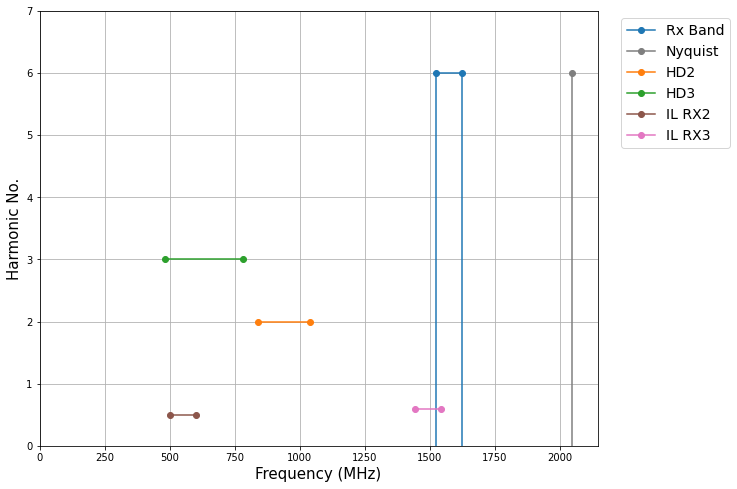

Calibration Mode = Mode1
Error = None
Warning = IL3, FS/2-HD3, FS/4+HD3, FS/8+HD2


In [132]:
get_plot(signal_f, interf_f, fs_rf, fc, fs_bw, hd, il, fs_hd, clk_mix_prod_up, clk_mix_prod_down, sw)
print("Calibration Mode = %s" % get_calibration_mode(fs_rf, fc))
print("Error = %s" % error)
print("Warning = %s" % warning)